# Proyecto integral. Sprint 11

## Descripción del proyecto 

Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

Primero, estudia el embudo de ventas. Descubre cómo los usuarios y las usuarias llegan a la etapa de compra. ¿Cuántos usuarios o usuarias realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?

Luego, observa los resultados de un test A/A/B. (Sigue leyendo para obtener más información sobre los test A/A/B). Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios y las usuarias piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. Descubre qué conjunto de fuentes produce mejores resultados.

Crear dos grupos A tiene ciertas ventajas. Podemos establecer el principio de que solo confiaremos en la exactitud de nuestras pruebas cuando los dos grupos de control sean similares. Si hay diferencias significativas entre los grupos A, esto puede ayudarnos a descubrir factores que pueden estar distorsionando los resultados. La comparación de grupos de control también nos dice cuánto tiempo y datos necesitaremos cuando realicemos más tests.

Utilizarás el mismo dataset para el análisis general y para el análisis A/A/B. En proyectos reales, los experimentos se llevan a cabo constantemente. El equipo de análisis estudia la calidad de una aplicación utilizando datos generales, sin prestar atención a si los usuarios y las usuarias participan en experimentos.


## Descripción de los datos

Cada entrada de registro es una acción de usuario o un evento.

- EventName: nombre del evento.
- DeviceIDHash: identificador de usuario unívoco.
- EventTimestamp: hora del evento.
- ExpId: número de experimento: 246 y 247 son los grupos de control, 248 es el grupo de prueba.

## Desarrollo 

### Paso 1. Abrir el archivo de datos y leer la información general

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv('/datasets/logs_exp_us.csv', sep = '\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [4]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


### Paso 2. Preparar los datos para el análisis

- Cambia el nombre de las columnas de manera que sea conveniente para ti
- Comprueba si hay tipos de datos y valores ausentes. Corrige los datos si es necesario
- Agrega una columna de fecha y hora y una columna separada para las fechas

In [5]:
data.rename(columns={
    'EventName': 'evento',
    'DeviceIDHash': 'id usuario',
    'EventTimestamp': 'fecha_evento',
    'ExpId': 'experimento'
}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   evento        244126 non-null  object
 1   id usuario    244126 non-null  int64 
 2   fecha_evento  244126 non-null  int64 
 3   experimento   244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [6]:
print('Datos ausentes: \n', data.isna().sum())

Datos ausentes: 
 evento          0
id usuario      0
fecha_evento    0
experimento     0
dtype: int64


In [7]:
print('Datos duplicados: \n', data.duplicated().sum())

Datos duplicados: 
 413


In [8]:
data.drop_duplicates()

,evento,id usuario,fecha_evento,experimento
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [9]:
data['fecha_evento'] = pd.to_datetime(data['fecha_evento'], unit='s')

In [10]:
data['fecha'] = data['fecha_evento'].dt.date
data['hora'] = data['fecha_evento'].dt.time

In [11]:
data.tail()

,evento,id usuario,fecha_evento,experimento,fecha,hora
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21:12:25
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21:13:59
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21:14:43
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21:14:58
244125,OffersScreenAppear,5746969938801999050,2019-08-07 21:15:17,246,2019-08-07,21:15:17


### Paso 3. Estudiar y comprobar los datos

#### ¿Cuántos eventos hay en los registros?

In [12]:
eventos = data['evento'].nunique()
print('Número de eventos únicos: ', eventos)

Número de eventos únicos:  5


In [13]:
numero_eventos = data['evento'].value_counts()
print("Frecuencia de cada tipo de evento:")
print(numero_eventos)

Frecuencia de cada tipo de evento:
MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: evento, dtype: int64


#### ¿Cuántos usuarios y usuarias hay en los registros?

In [14]:
usuarios = data['id usuario'].nunique()
print(f"Número total de usuarios únicos: {usuarios}")

Número total de usuarios únicos: 7551


#### ¿Cuál es el promedio de eventos por usuario?

In [15]:
total_eventos = data.shape[0]
promedio_eventos_por_usuario = total_eventos / usuarios
print('promedio de eventos por usuario:')
print(promedio_eventos_por_usuario)

promedio de eventos por usuario:
32.33028737915508


In [16]:
#fecha mínima y máxima
fecha_max = data['fecha'].max()
fecha_min = data['fecha'].min()
print('fecha mínima: ', fecha_min)
print()
print('fecha máxima: ', fecha_max)

fecha mínima:  2019-07-25

fecha máxima:  2019-08-07


El periodo de prueba incio el 25 de julio 2019 y finalizó el 7 de agosto del mismo año, es decir, 14 días.   

##### Traza un histograma por fecha y hora.

In [17]:
eventos_por_fecha = data['fecha_evento'].value_counts().sort_index()

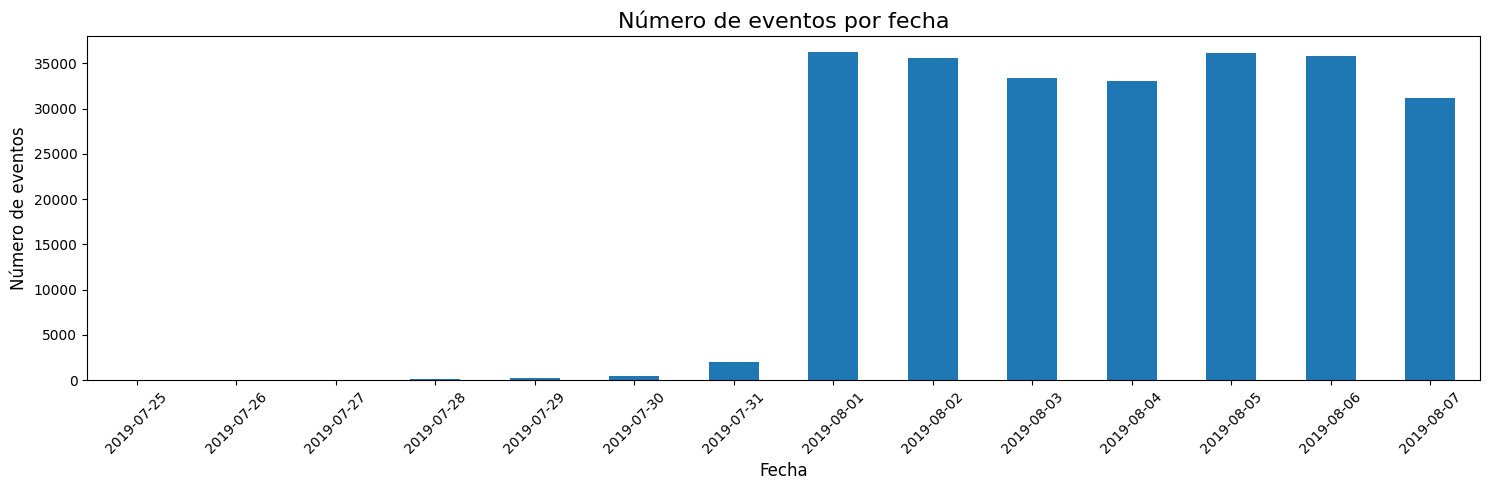

In [18]:
data['fecha'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
plt.title('Número de eventos por fecha', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.barplot(x=eventos_por_fecha.index, y=eventos_por_fecha.values, color='skyblue')

##### Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

In [19]:
threshold = eventos_por_fecha.median() * 0.5  # 50% como referencia
complete_data_start_date = eventos_por_fecha[eventos_por_fecha > threshold].index.min()

print(f"Los datos comienzan a estar completos a partir del: {complete_data_start_date}")

Los datos comienzan a estar completos a partir del: 2019-07-25 04:43:36


In [20]:
filtered_data = data[data['fecha_evento'] >= pd.to_datetime(complete_data_start_date)]

# Nuevo periodo representativo
filtered_min_date = filtered_data['fecha_evento'].min()
filtered_max_date = filtered_data['fecha_evento'].max()
print(f"Periodo realmente representado por los datos: Desde {filtered_min_date} hasta {filtered_max_date}")

Periodo realmente representado por los datos: Desde 2019-07-25 04:43:36 hasta 2019-08-07 21:15:17


#### Asegúrate de tener usuarios y usuarias de los tres grupos experimentales.

In [21]:
usuarios_por_grupo = data.groupby('experimento')['id usuario'].nunique()

print("Número de usuarios únicos por grupo experimental:")
print(usuarios_por_grupo)

Número de usuarios únicos por grupo experimental:
experimento
246    2489
247    2520
248    2542
Name: id usuario, dtype: int64


### Paso 4. Estudiar el embudo de eventos

#### Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [22]:
frecuencia_eventos = data['evento'].value_counts()

print("Frecuencia de eventos, ordenada de mayor a menor:")
print(frecuencia_eventos)

Frecuencia de eventos, ordenada de mayor a menor:
MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: evento, dtype: int64


#### Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios y usuarias. Calcula la proporción de usuarios y usuarias que realizaron la acción al menos una vez.

In [23]:
# Contar la cantidad de usuarios únicos que realizaron cada acción
usuarios_por_evento = data.groupby('evento')['id usuario'].nunique()

In [24]:
# Proporción de usuarios 
total_usuarios = data['id usuario'].nunique()
proporcion_evento = usuarios_por_evento / total_usuarios * 100

In [25]:
# Combinar los resultados
analisis_evento = pd.DataFrame({
    'Usuarios': usuarios_por_evento,
    'Proporcion (%)': proporcion_evento
}).sort_values(by='Usuarios', ascending=False)

In [26]:
print("Usuarios únicos y proporción por evento:")
print(analisis_evento)

Usuarios únicos y proporción por evento:
                         Usuarios  Proporcion (%)
evento                                           
MainScreenAppear             7439       98.516753
OffersScreenAppear           4613       61.091246
CartScreenAppear             3749       49.649053
PaymentScreenSuccessful      3547       46.973911
Tutorial                      847       11.217057


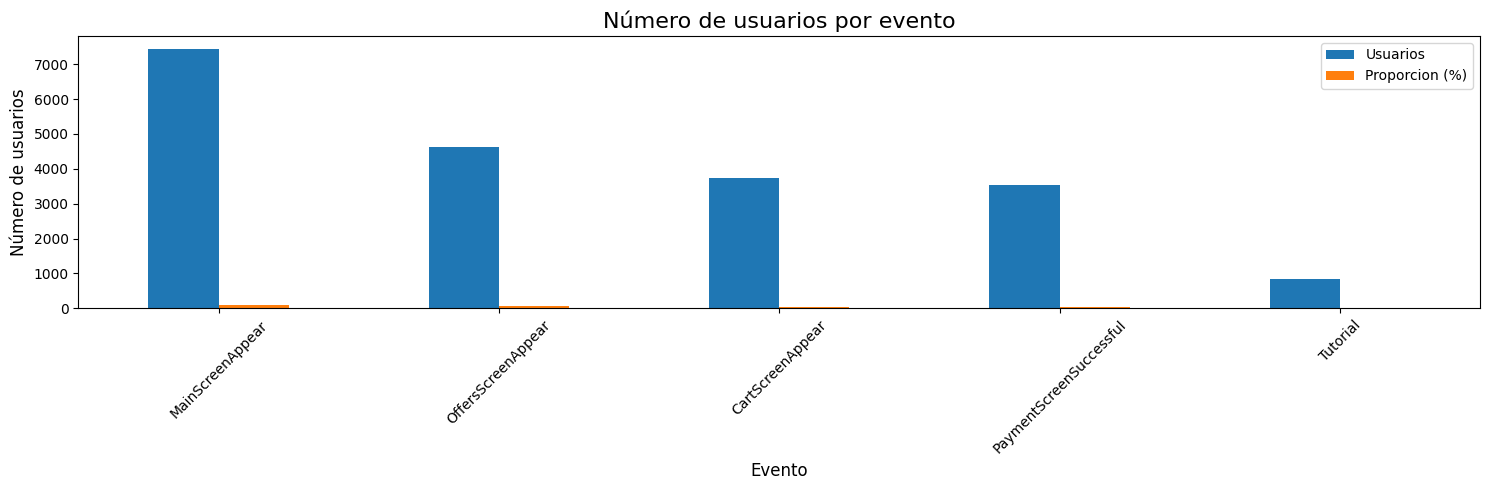

In [54]:
analisis_evento.plot(kind='bar', figsize=(15, 5))
plt.title('Número de usuarios por evento', fontsize=16)
plt.xlabel('Evento', fontsize=12)
plt.ylabel('Número de usuarios', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El evento "MainScreenAppear" tiene el mayor número de usuarios (7439), lo que indica que la mayoría de los usuarios interactúan con la pantalla principal de la aplicación. Esto podría considerarse como el punto de entrada clave para los usuarios.

A medida que los usuarios avanzan hacia eventos más específicos como "OffersScreenAppear," "CartScreenAppear," y "PaymentScreenSuccessful," el número de usuarios disminuye progresivamente. Esto sugiere que hay una pérdida de usuarios en cada etapa del embudo de conversión.

#### Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente. 

(Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B).

In [27]:
# Orden de los eventos
etapas_embudo = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',    
    'PaymentScreenSuccessful',
    'Tutorial'
]

In [28]:
# Filtrar solo los eventos del embudo
data_embudo = data[data['evento'].isin(etapas_embudo)]

In [29]:
# Contar usuarios únicos por cada etapa del embudo
usuarios_por_embudo = data_embudo.groupby('evento')['id usuario'].nunique().reindex(etapas_embudo)
print(usuarios_por_embudo)

evento
MainScreenAppear           7439
OffersScreenAppear         4613
CartScreenAppear           3749
PaymentScreenSuccessful    3547
Tutorial                    847
Name: id usuario, dtype: int64


In [30]:
# Calcular la proporción de usuarios que pasan de una etapa a la siguiente
paso_de_etapa = usuarios_por_embudo / usuarios_por_embudo.shift(1) * 100

# Combinar los resultados en un DataFrame para claridad
analisis_embudo = pd.DataFrame({
    'Users': usuarios_por_embudo,
    'Conversion Rate (%)': paso_de_etapa
})

# Mostrar los resultados
print("Análisis del embudo de eventos:")
print(analisis_embudo)

Análisis del embudo de eventos:
                         Users  Conversion Rate (%)
evento                                             
MainScreenAppear          7439                  NaN
OffersScreenAppear        4613            62.011023
CartScreenAppear          3749            81.270323
PaymentScreenSuccessful   3547            94.611897
Tutorial                   847            23.879335


El resultado NaN nos indica que no hay datos anteriores, con los cuales calcular una proporción. ya que la primera etapa es cuando el usuario entra a la ventana principal del sitio. Es la primera etapa del embudo

En la etapa que más se pierde usuarios es despues de realizar su compra solo el 23% de los usuarios que completaron su compra pasan al evento 'Tutorial'
Y tambien se puede observar que la tasa de conversion en la primera etapa se podria mejorar. Ya que esta presentando que solo un 62 % de los usuarios que entran a la ventana principal entran a ver las ofertas


#### ¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?

In [31]:
usuarios_etapa_inicio = data[data['evento'] == 'MainScreenAppear']['id usuario'].nunique()
usuarios_etapa_fin = data[data['evento'] == 'PaymentScreenSuccessful']['id usuario'].nunique()

tasa_inicio_final_etapa =  usuarios_etapa_fin/usuarios_etapa_inicio *100
print(f"Porcentaje de usuarios que completan todo el embudo: {tasa_inicio_final_etapa} %")

Porcentaje de usuarios que completan todo el embudo: 47.68113993816373 %


Un 47% de los usuarios que ingresan al sitio realiza una compra. 

### Paso 5. Estudiar los resultados del experimento

#### ¿Cuántos usuarios y usuarias hay en cada grupo?

In [32]:
print("Número de usuarios únicos por grupo experimental:")
print(usuarios_por_grupo)

Número de usuarios únicos por grupo experimental:
experimento
246    2489
247    2520
248    2542
Name: id usuario, dtype: int64


#### Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247. 

Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos.
Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos.

In [33]:
# Evento MainScreenAppear 
evento_por_analizar = 'MainScreenAppear'
data_evento = data[data['evento'] == evento_por_analizar]
# Usuarios que completaron el evento en los grupos 246 y 247
grupo_246 = data_evento[data_evento['experimento'] == 246]['id usuario'].nunique()
grupo_247 = data_evento[data_evento['experimento'] == 247]['id usuario'].nunique()
#print('usuarios en el expiremento 246 del evento MainScreenAppear: ', grupo_246)
#print('usuarios en el expiremento 247 del evento MainScreenAppear: ', grupo_247)

In [34]:
# Total de usuarios en cada grupo
total_usuarios_246 = data[data['experimento'] == 246]['id usuario'].nunique()
total_usuarios_247 = data[data['experimento'] == 247]['id usuario'].nunique()
#print('Total de usuarios en el expiremento 246: ', total_usuarios_246)
#print('Total de usuarios en el expiremento 247: ', total_usuarios_247)

In [35]:
# Crear la tabla de contingencia
tabla_de_contingencia = [
    [grupo_246, total_usuarios_246 - grupo_246],
    [grupo_247, total_usuarios_247 - grupo_247]
]

In [36]:
chi2, p_value, _, _ = chi2_contingency(tabla_de_contingencia)

In [37]:
print("Resultados de la prueba chi-cuadrado:")
print(f"Chi2: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

Resultados de la prueba chi-cuadrado:
Chi2: 0.1811
P-value: 0.6704


In [38]:
if p_value < 0.05:
    print("Hay una diferencia estadísticamente significativa entre los grupos 246 y 247.")
else:
    print("No hay una diferencia estadísticamente significativa entre los grupos 246 y 247.")

No hay una diferencia estadísticamente significativa entre los grupos 246 y 247.


#### ¿Puedes confirmar que los grupos se dividieron correctamente?

In [39]:
# Encontrar el evento más popular
most_popular_event = data['evento'].value_counts().idxmax()
print('evento más popular: ', most_popular_event)

evento más popular:  MainScreenAppear


In [40]:
# Contar usuarios por grupo y evento
user_counts = data.groupby(['experimento', 'evento', 'id usuario']).size().reset_index(name='count')
user_counts = user_counts[user_counts['evento'] == most_popular_event]


In [41]:
print(user_counts)

       experimento            evento           id usuario  count
1270           246  MainScreenAppear     6888746892508752      1
1271           246  MainScreenAppear     6922444491712477     19
1272           246  MainScreenAppear     8740973466195562      8
1273           246  MainScreenAppear    12692216027168046      7
1274           246  MainScreenAppear    15708180189885246     27
...            ...               ...                  ...    ...
17185          248  MainScreenAppear  9212420551954885212     30
17186          248  MainScreenAppear  9212523802225607780      5
17187          248  MainScreenAppear  9214668690707156694     10
17188          248  MainScreenAppear  9219463515465815368     11
17189          248  MainScreenAppear  9222603179720523844     59

[7439 rows x 4 columns]


In [42]:
tabla_contingencia_2 = pd.pivot_table(user_counts, values='count', index='experimento', columns='evento', aggfunc='sum')
tabla_contingencia_2 = tabla_contingencia_2[most_popular_event]

In [43]:
chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia_2)

In [44]:
print("Evento más popular:", most_popular_event)
print("Tabla de contingencia:")
print(tabla_contingencia_2)
print("Estadístico chi-cuadrado:", chi2)
print("Valor p:", p_value)

Evento más popular: MainScreenAppear
Tabla de contingencia:
experimento
246    38281
247    39710
248    41214
Name: MainScreenAppear, dtype: int64
Estadístico chi-cuadrado: 0.0
Valor p: 1.0


In [45]:
if p_value < 0.05:
    print("La diferencia en las proporciones es estadísticamente significativa.")
else:
    print("La diferencia en las proporciones no es estadísticamente significativa.")

La diferencia en las proporciones no es estadísticamente significativa.


Con los resultados obtenidos: un valor p de 1.0 indica que no hay evidencia estadística para rechazar la hipótesis nula de que las proporciones de este evento son iguales en los tres grupos. Es decir, no hay diferencias significativas en la frecuencia con la que este evento ocurre en cada grupo.

El hecho de que no haya diferencias significativas en la frecuencia del evento más popular podría sugerir que los grupos se dividieron de manera equitativa.

In [46]:
def analizar_eventos(data, grupo_col, evento_col, id_usuario_col):

    # Identificar el evento más popular
    evento_popular = data[evento_col].value_counts().idxmax()
    print(f"Evento más popular: {evento_popular}")

    # Crear un DataFrame para almacenar los resultados
    resultados = pd.DataFrame(columns=['evento', 'grupo', 'frecuencia', 'proporcion', 'chi2', 'p_value'])

    # Obtener todos los eventos únicos
    eventos_unicos = data[evento_col].unique()

    for evento in eventos_unicos:
        # Crear una tabla de contingencia para cada evento
        tabla_contingencia = pd.crosstab(data[grupo_col], data[evento_col] == evento)

        # Calcular frecuencias y proporciones para cada grupo
        for grupo in tabla_contingencia.index:
            frecuencia = tabla_contingencia.loc[grupo, True]
            proporcion = frecuencia / tabla_contingencia.loc[grupo, :].sum()
            resultados = resultados.append({'evento': evento, 'grupo': grupo, 'frecuencia': frecuencia,
                                            'proporcion': proporcion}, ignore_index=True)

        # Prueba de chi-cuadrado
        if tabla_contingencia.shape[0] > 1 and tabla_contingencia.shape[1] > 1:
            chi2, p, _, _ = chi2_contingency(tabla_contingencia)
            resultados.loc[resultados.evento == evento, ['chi2', 'p_value']] = [chi2, p]

    return resultados

In [47]:
resultados = analizar_eventos(data, grupo_col='experimento', evento_col='evento', id_usuario_col='Id usuario')


Evento más popular: MainScreenAppear


In [60]:
print(resultados[['evento', 'grupo', 'p_value']])

                     evento grupo       p_value
0          MainScreenAppear   246  1.767364e-42
1          MainScreenAppear   247  1.767364e-42
2          MainScreenAppear   248  1.767364e-42
3   PaymentScreenSuccessful   246  1.844052e-29
4   PaymentScreenSuccessful   247  1.844052e-29
5   PaymentScreenSuccessful   248  1.844052e-29
6          CartScreenAppear   246  1.046794e-36
7          CartScreenAppear   247  1.046794e-36
8          CartScreenAppear   248  1.046794e-36
9        OffersScreenAppear   246  1.181168e-07
10       OffersScreenAppear   247  1.181168e-07
11       OffersScreenAppear   248  1.181168e-07
12                 Tutorial   246  3.403216e-01
13                 Tutorial   247  3.403216e-01
14                 Tutorial   248  3.403216e-01


## Conclusiones 

Eventos con p-values bajos (< 0.05):
- MainScreenAppear:

Los valores de p (~1.77e-42) son significativamente bajos, indicando que hay una diferencia estadísticamente significativa entre el grupo experimental y los grupos de control.
Esto sugiere que el experimento tuvo un impacto claro en la interacción de los usuarios con la pantalla principal.
- PaymentScreenSuccessful:

Los valores de p (~1.84e-29) también son muy bajos, lo que indica diferencias significativas.
Esto es positivo, ya que implica que el experimento podría haber influido favorablemente en el éxito de los pagos.
- CartScreenAppear:

Los valores de p (~1.05e-36) muestran que las diferencias son significativas entre el grupo experimental y los grupos de control.
Esto sugiere que el experimento impactó la interacción con la pantalla del carrito, un paso clave en el proceso de conversión.
- OffersScreenAppear:

Los valores de p (~1.18e-07) también son estadísticamente significativos, aunque no tan extremos como en los casos anteriores.
Esto indica que el experimento influyó en el interés de los usuarios por las ofertas.
Evento con p-value > 0.05 (no significativo):
- Tutorial:
El valor de p (~0.34) es alto, lo que indica que no hay diferencias estadísticamente significativas entre los grupos para este evento.
Esto podría significar que el experimento no tuvo impacto en la participación en el tutorial, o que los usuarios simplemente no encontraron relevante esta función.

Use un nivel de significancia de 0.05 (5%), lo que significa se puede aceptar un 5% de probabilidad de rechazar erróneamente la hipótesis nula

Hemos logrado identificar eventos en los que existe una diferencia estadísticamente significativa entre los grupos de control y el grupo experimental. lo que nos muestra el impacto en el comportamiento de los usuarios en relación con estos eventos específicos.

Los resultados del análisis pueden tener implicaciones prácticas para el diseño de interfaces, la toma de decisiones en marketing digital o la mejora de la experiencia del usuario.

Existen ligeras variaciones en la proporción de usuarios que vieron la pantalla principal en los distintos grupos. Sin embargo, estas diferencias parecen mínimas y pueden no ser estadísticamente significativas.

Al igual que en la pantalla principal, existen pequeñas variaciones en la proporción de pagos exitosos entre los grupos. Las diferencias son relativamente pequeñas.

La proporción de usuarios que ven el tutorial es muy baja en todos los grupos y las diferencias son insignificantes.

La manipulación experimental no tuvo un impacto significativo en el comportamiento del usuario. Las proporciones de usuarios que realizaron diferentes acciones son relativamente consistentes en todos los grupos.

El comportamiento del usuario parece estar impulsado por otros factores que no se capturan en estos datos, como el diseño general de la aplicación, las preferencias del usuario o factores externos.